In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
import obspy
import os
from obspy.clients.fdsn import Client
from obspy.clients.syngine import Client as SyngineClient
from obspy.taup import TauPyModel
from obspy.geodetics import kilometer2degrees
from obspy.io.xseed import Parser
from obspy.signal.cross_correlation import xcorr,xcorr_3c

In [3]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

# Real data

In [4]:
ev_listr = []
ev_listrS = []

for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            ev_listr.append(os.path.join(root, datafile))
ev_listrS = sorted(ev_listr)

ev_listt = []
ev_listtS = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            ev_listt.append(os.path.join(root, datafile))
ev_listtS = sorted(ev_listt)

In [5]:
ev_a1r = []
ev_a25r = []
ev_a05r = []

for i,j in enumerate(ev_listrS):
    if '_1.0' in j:
        ev_a1r.append(j)
    elif '_2.5' in j:
        ev_a25r.append(j)
    else:
        ev_a05r.append(j)
        
ev_a1t = []
ev_a25t = []
ev_a05t = []
for i,j in enumerate(ev_listtS):
    if '_1.0' in j:
        ev_a1t.append(j)
    elif '_2.5' in j:
        ev_a25t.append(j)
    else:
        ev_a05t.append(j)

In [6]:
ev_RF_list_r_10 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(ev_a1r):
    for l,k in enumerate(STA):
        if k in j:
            ev_RF_list_r_10[l].append(j)
            
ev_RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(ev_a25r):
    for l,k in enumerate(STA):
        if k in j:
            ev_RF_list_r_25[l].append(j)
            
ev_RF_list_r_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(ev_a05r):
    for l,k in enumerate(STA):
        if k in j:
            ev_RF_list_r_05[l].append(j)

In [7]:
ev_RF_list_t_10 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(ev_a1t):
    for l,k in enumerate(STA):
        if k in j:
            ev_RF_list_t_10[l].append(j)
            
ev_RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(ev_a25t):
    for l,k in enumerate(STA):
        if k in j:
            ev_RF_list_t_25[l].append(j)
            
ev_RF_list_t_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(ev_a05t):
    for l,k in enumerate(STA):
        if k in j:
            ev_RF_list_t_05[l].append(j)

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [8]:
z = 0

# a = 0.5

In [9]:
ev_RF_05 = []
ev_TF_05 = []
for i,j in enumerate(ev_RF_list_r_05[z]):
    ev_RF_05.append(obspy.read(j))
    ev_TF_05.append(obspy.read(ev_RF_list_t_05[z][i]))

In [10]:
ev_RFgcarc_05 = [i[0].stats.sac.gcarc for i in ev_RF_05]
ev_RFevdp_05 = [i[0].stats.sac.evdp for i in ev_RF_05]
ev_RFbaz_05 = [i[0].stats.sac.baz for i in ev_RF_05]
ev_RFRP_05 = [i[0].stats.sac.user8 for i in ev_RF_05]

ev_orglisl_05 = np.argsort(ev_RFRP_05)

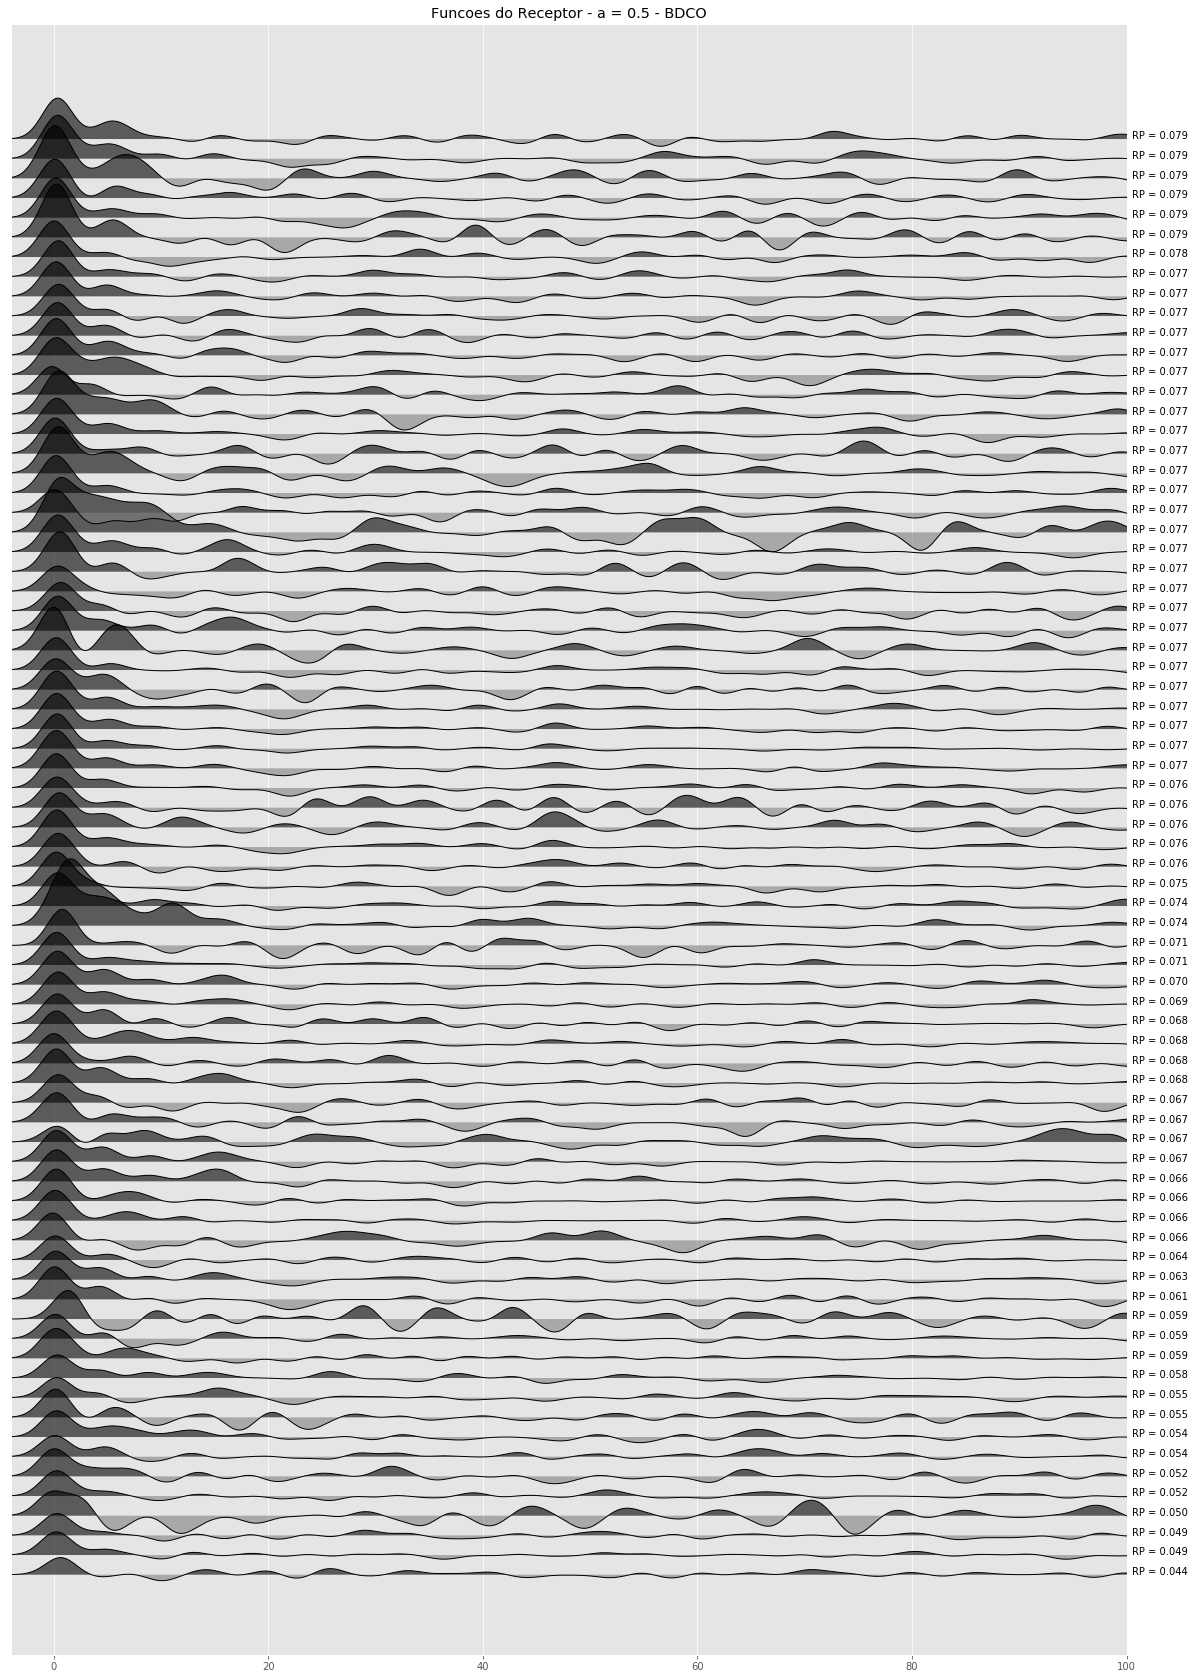

In [11]:
factor = 10
plt.figure(figsize = (20,30))
for j, i in enumerate(ev_orglisl_05): 
    #plt.plot(ev_TF_05[i][0].times()-10,j/factor+ev_TF_05[i][0].data,'r',linewidth=0.7)
    plt.plot(ev_RF_05[i][0].times()-10,j/factor+ev_RF_05[i][0].data,'k',linewidth=1)
    plt.fill_between(ev_RF_05[i][0].times()-10,j/factor+ev_RF_05[i][0].data,j/factor,where=(j/factor+ev_RF_05[i][0].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(ev_RF_05[i][0].times()-10,j/factor+ev_RF_05[i][0].data,j/factor,where=(j/factor+ev_RF_05[i][0].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/factor,'RP = %s' % "{0:.3f}".format(ev_RFRP_05[i]),fontsize=10)
    #plt.text(100.5,j/factor,'Gcarc = %s' % "{0:.0f}".format(ev_RFgcarc_05[i]),fontsize=10)
    #plt.text(80.5,j/factor,'BAZ = %s' % "{0:.1f}".format(RFbaz_05[i]),fontsize=7)
    #plt.text(80.5,j/factor,'EVDP = %s' % "{0:.1f}".format(RFevdp_05[i]),fontsize=7)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,100)
os.makedirs('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z],exist_ok=True)
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z]+'/ev_RF_ a_05_'+STA[z]+'.pdf',dpi=300)

# a = 1.0

In [12]:
ev_RF_10 = []
ev_TF_10 = []
for i,j in enumerate(ev_RF_list_r_10[z]):
    ev_RF_10.append(obspy.read(j))
    ev_TF_10.append(obspy.read(ev_RF_list_t_10[z][i]))

In [13]:
ev_RFgcarc_10 = [i[0].stats.sac.gcarc for i in ev_RF_10]
ev_RFevdp_10 = [i[0].stats.sac.evdp for i in ev_RF_10]
ev_RFbaz_10 = [i[0].stats.sac.baz for i in ev_RF_10]
ev_RFRP_10 = [i[0].stats.sac.user8 for i in ev_RF_10]

ev_orglisl_10 = np.argsort(ev_RFRP_10)

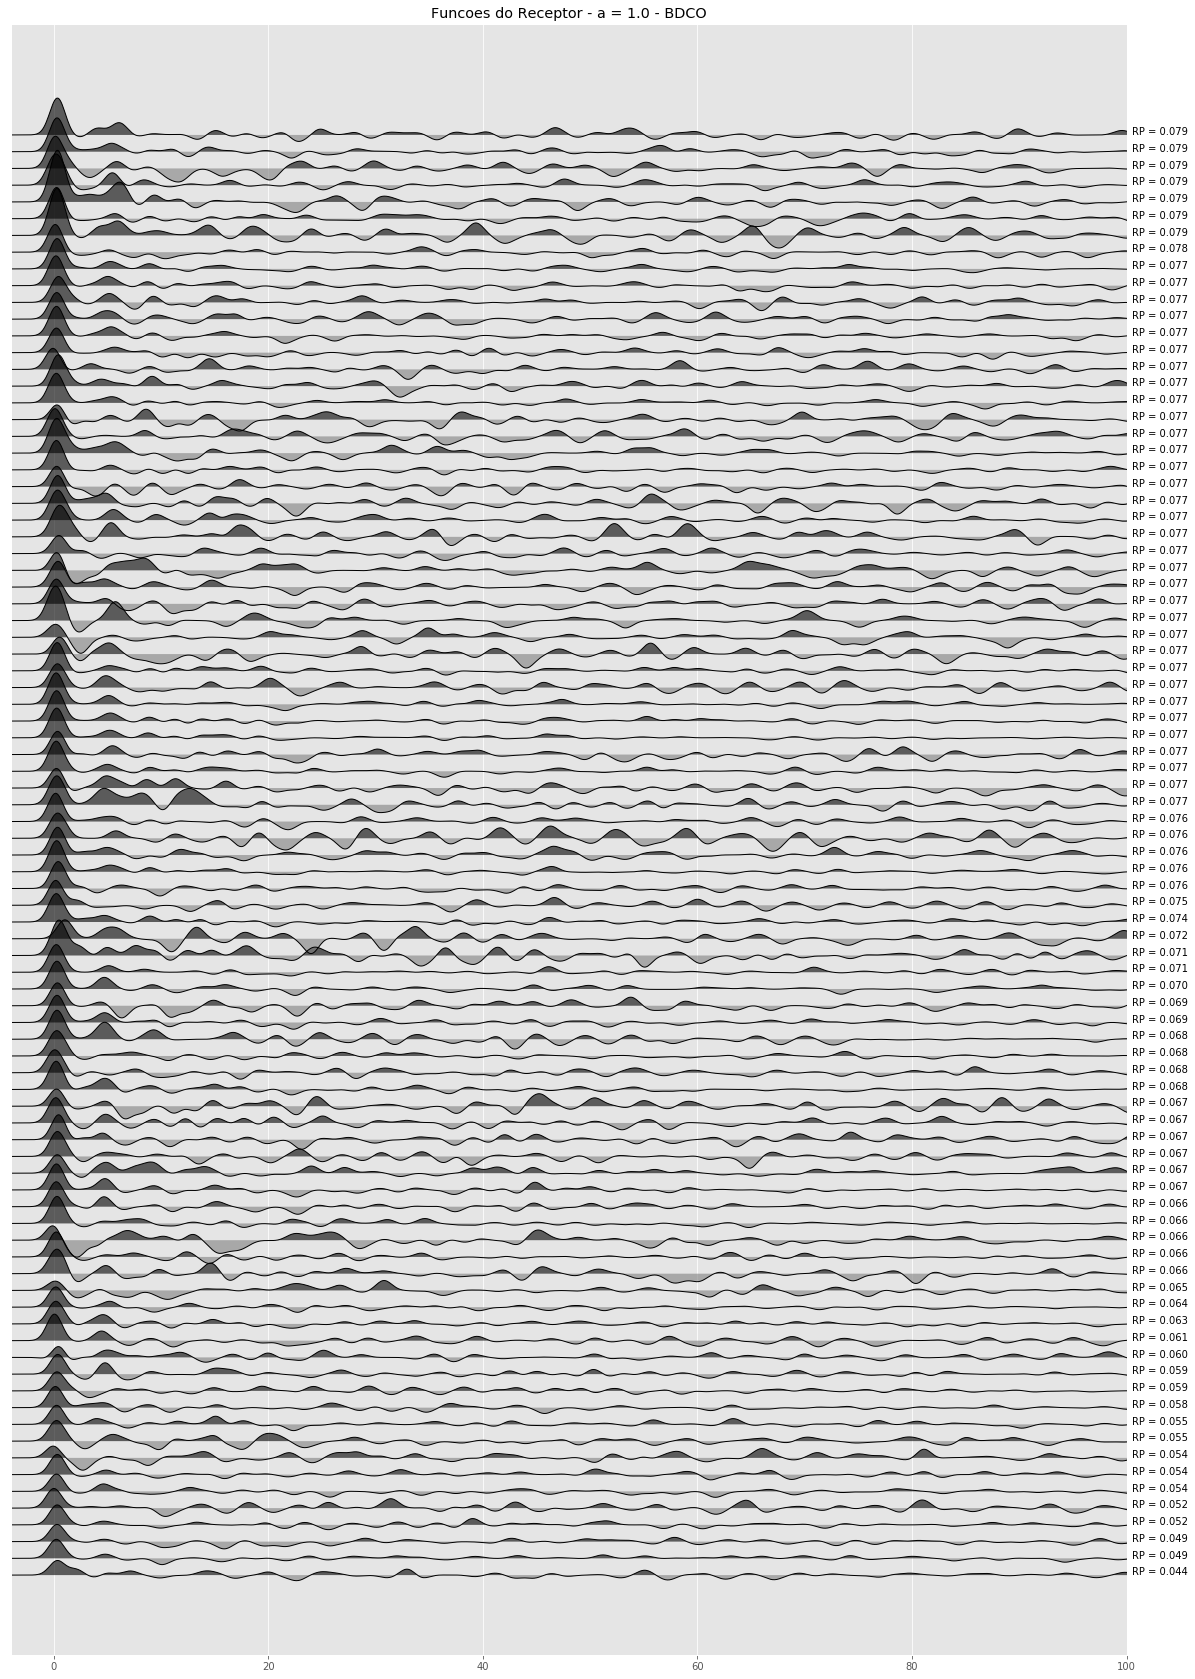

In [14]:
factor = 5
plt.figure(figsize = (20,30))
for j, i in enumerate(ev_orglisl_10): 
    #plt.plot(ev_TF_10[i][0].times()-10,j/factor+ev_TF_10[i][0].data,'r',linewidth=0.7)
    plt.plot(ev_RF_10[i][0].times()-10,j/factor+ev_RF_10[i][0].data,'k',linewidth=1)
    plt.fill_between(ev_RF_10[i][0].times()-10,j/factor+ev_RF_10[i][0].data,j/factor,where=(j/factor+ev_RF_10[i][0].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(ev_RF_10[i][0].times()-10,j/factor+ev_RF_10[i][0].data,j/factor,where=(j/factor+ev_RF_10[i][0].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/factor,'RP = %s' % "{0:.3f}".format(ev_RFRP_10[i]),fontsize=10)
    #plt.text(80.5,j/factor,'Gcarc = %s' % "{0:.0f}".format(ev_RFgcarc_10[i]),fontsize=10)
    #plt.text(80.5,j/factor,'BAZ = %s' % "{0:.1f}".format(RFbaz_05[i]),fontsize=7)
    #plt.text(80.5,j/factor,'EVDP = %s' % "{0:.1f}".format(RFevdp_05[i]),fontsize=7)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)
os.makedirs('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z],exist_ok=True)
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z]+'/ev_RF_ a_10_'+STA[z]+'.pdf',dpi=300)

# a = 2.5

In [15]:
ev_RF_25 = []
ev_TF_25 = []
for i,j in enumerate(ev_RF_list_r_25[z]):
    ev_RF_25.append(obspy.read(j))
    ev_TF_25.append(obspy.read(ev_RF_list_t_25[z][i]))

In [16]:
ev_RFgcarc_25 = [i[0].stats.sac.gcarc for i in ev_RF_25]
ev_RFevdp_25 = [i[0].stats.sac.evdp for i in ev_RF_25]
ev_RFbaz_25 = [i[0].stats.sac.baz for i in ev_RF_25]
ev_RFRP_25 = [i[0].stats.sac.user8 for i in ev_RF_25]

ev_orglisl_25 = np.argsort(ev_RFRP_25)

In [17]:
factor = 2.5
plt.figure(figsize = (20,30))
for j, i in enumerate(ev_orglisl_25): 
    #plt.plot(ev_TF_25[i][0].times()-10,j/factor+ev_TF_25[i][0].data,'r',linewidth=0.7)
    plt.plot(ev_RF_25[i][0].times()-10,j/factor+ev_RF_25[i][0].data,'k',linewidth=1)
    plt.fill_between(ev_RF_25[i][0].times()-10,j/factor+ev_RF_25[i][0].data,j/factor,where=(j/factor+ev_RF_25[i][0].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(ev_RF_25[i][0].times()-10,j/factor+ev_RF_25[i][0].data,j/factor,where=(j/factor+ev_RF_25[i][0].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(100.5,j/factor,'RP = %s' % "{0:.3f}".format(ev_RFRP_25[i]),fontsize=10)
    #plt.text(80.5,j/factor,'Gcarc = %s' % "{0:.0f}".format(ev_RFgcarc_25[i]),fontsize=10)
    #plt.text(80.5,j/factor,'BAZ = %s' % "{0:.1f}".format(RFbaz_05[i]),fontsize=7)
    #plt.text(80.5,j/factor,'EVDP = %s' % "{0:.1f}".format(RFevdp_05[i]),fontsize=7)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,100)
os.makedirs('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z],exist_ok=True)
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z]+'/ev_RF_ a_25_'+STA[z]+'.pdf',dpi=300)

# Syntethic DATA

In [18]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [19]:
a1r = []
a25r = []
a05r = []

for i,j in enumerate(datalistSr):
    if '1.0' in j:
        a1r.append(j)
    elif '2.5' in j:
        a25r.append(j)
    else:
        a05r.append(j)
        
a1t = []
a25t = []
a05t = []
for i,j in enumerate(datalistSt):
    if '1.0' in j:
        a1t.append(j)
    elif '2.5' in j:
        a25t.append(j)
    else:
        a05t.append(j)

In [20]:
RF_list_r_10 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_10[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)
            
RF_list_r_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_05[l].append(j)

In [21]:
RF_list_t_10 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_10[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)
            
RF_list_t_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_05[l].append(j)

# a = 0.5

In [22]:
RF_05 = []
TF_05 = []
for i,j in enumerate(RF_list_r_05[z]):
    RF = obspy.read(j)
    if RF[0].stats.sac.user5 > 90:
        #TF_05.append(obspy.read(RF_list_t_05[i]))
        RF_05.append(obspy.read(j))

In [23]:
RFgcarc_05 = [i[0].stats.sac.gcarc for i in RF_05]
RFevdp_05 = [i[0].stats.sac.evdp for i in RF_05]
RFbaz_05 = [i[0].stats.sac.baz for i in RF_05]
RFRP_05 = [i[0].stats.sac.user8 for i in RF_05]

orglisl_05 = np.argsort(RFRP_05)

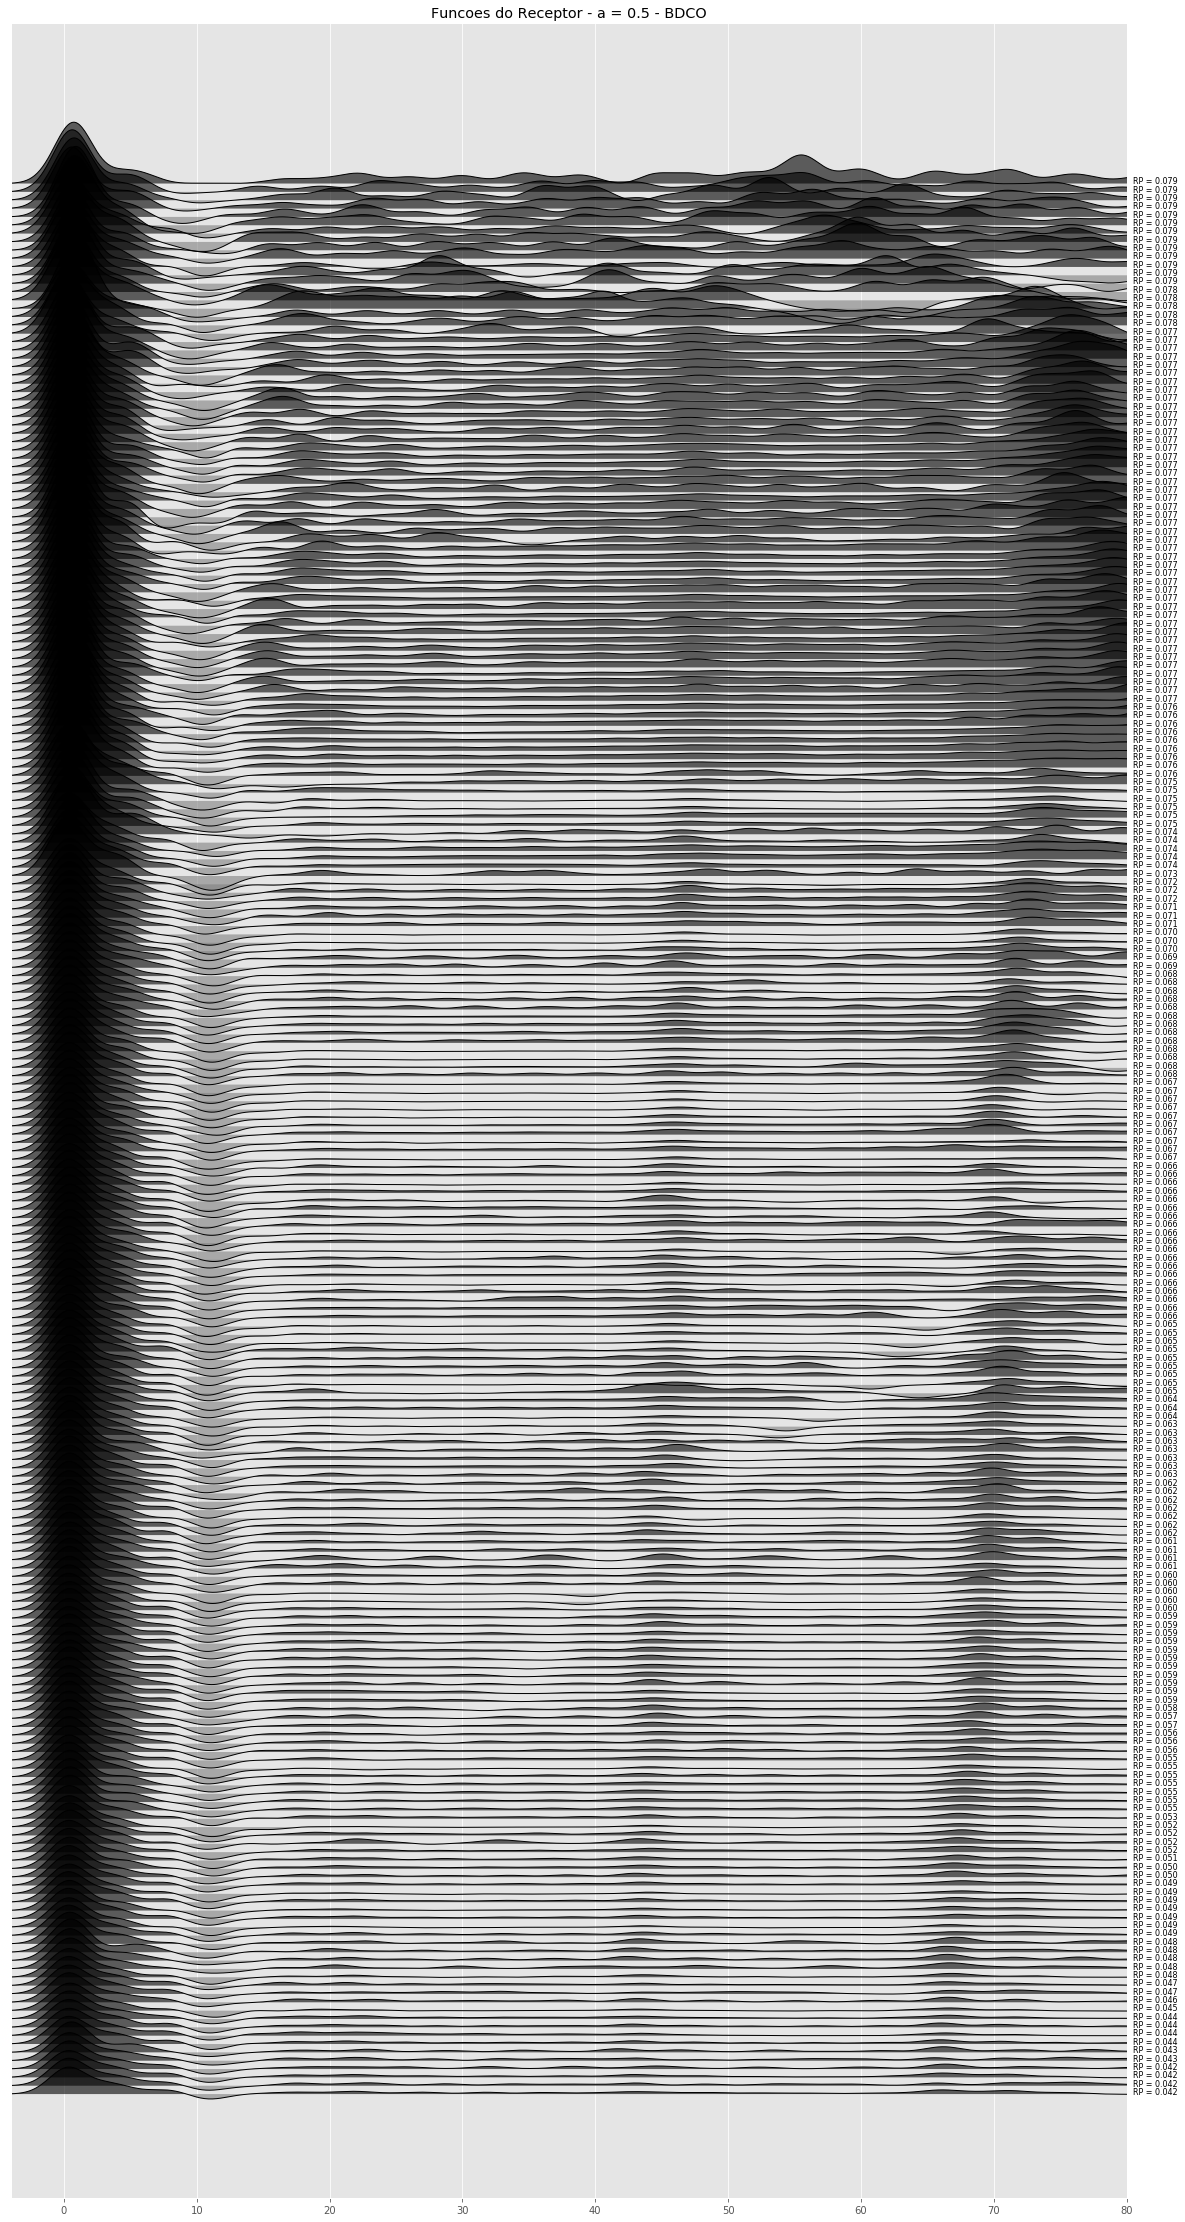

In [25]:
factor = 30
plt.figure(figsize = (20,40))
for j, i in enumerate(orglisl_05): 
    #plt.plot(TF_05[i][0].times()-10,j/factor+TF_05[i][0].data,'r',linewidth=0.7)
    plt.plot(RF_05[i][0].times()-10,j/factor+RF_05[i][0].data,'k',linewidth=1)
    plt.fill_between(RF_05[i][0].times()-10,j/factor+RF_05[i][0].data,j/factor,where=(j/factor+RF_05[i][0].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_05[i][0].times()-10,j/factor+RF_05[i][0].data,j/factor,where=(j/factor+RF_05[i][0].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(80.5,j/factor,'RP = %s' % "{0:.3f}".format(RFRP_05[i]),fontsize=8)
    #plt.text(80.5,j/factor,'Gcarc = %s' % "{0:.0f}".format(RFgcarc_05[i]),fontsize=10)
    #plt.text(80.5,j/factor,'BAZ = %s' % "{0:.1f}".format(RFbaz_05[i]),fontsize=7)
    #plt.text(80.5,j/factor,'EVDP = %s' % "{0:.1f}".format(RFevdp_05[i]),fontsize=7)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,80)
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z]+'/RF_ a_05_'+STA[z]+'.pdf',dpi=300)

# a = 1.0

In [25]:
RF_10 = []
TF_10 = []
for i,j in enumerate(RF_list_r_10[z]):
    RF = obspy.read(j)
    if RF[0].stats.sac.user5 > 95:
        #TF_10.append(obspy.read(RF_list_t_10[i]))
        RF_10.append(obspy.read(j))

In [26]:
RFgcarc_10 = [i[0].stats.sac.gcarc for i in RF_10]
RFevdp_10 = [i[0].stats.sac.evdp for i in RF_10]
RFbaz_10 = [i[0].stats.sac.baz for i in RF_10]
RFRP_10 = [i[0].stats.sac.user8 for i in RF_10]

orglisl_10 = np.argsort(RFRP_10)

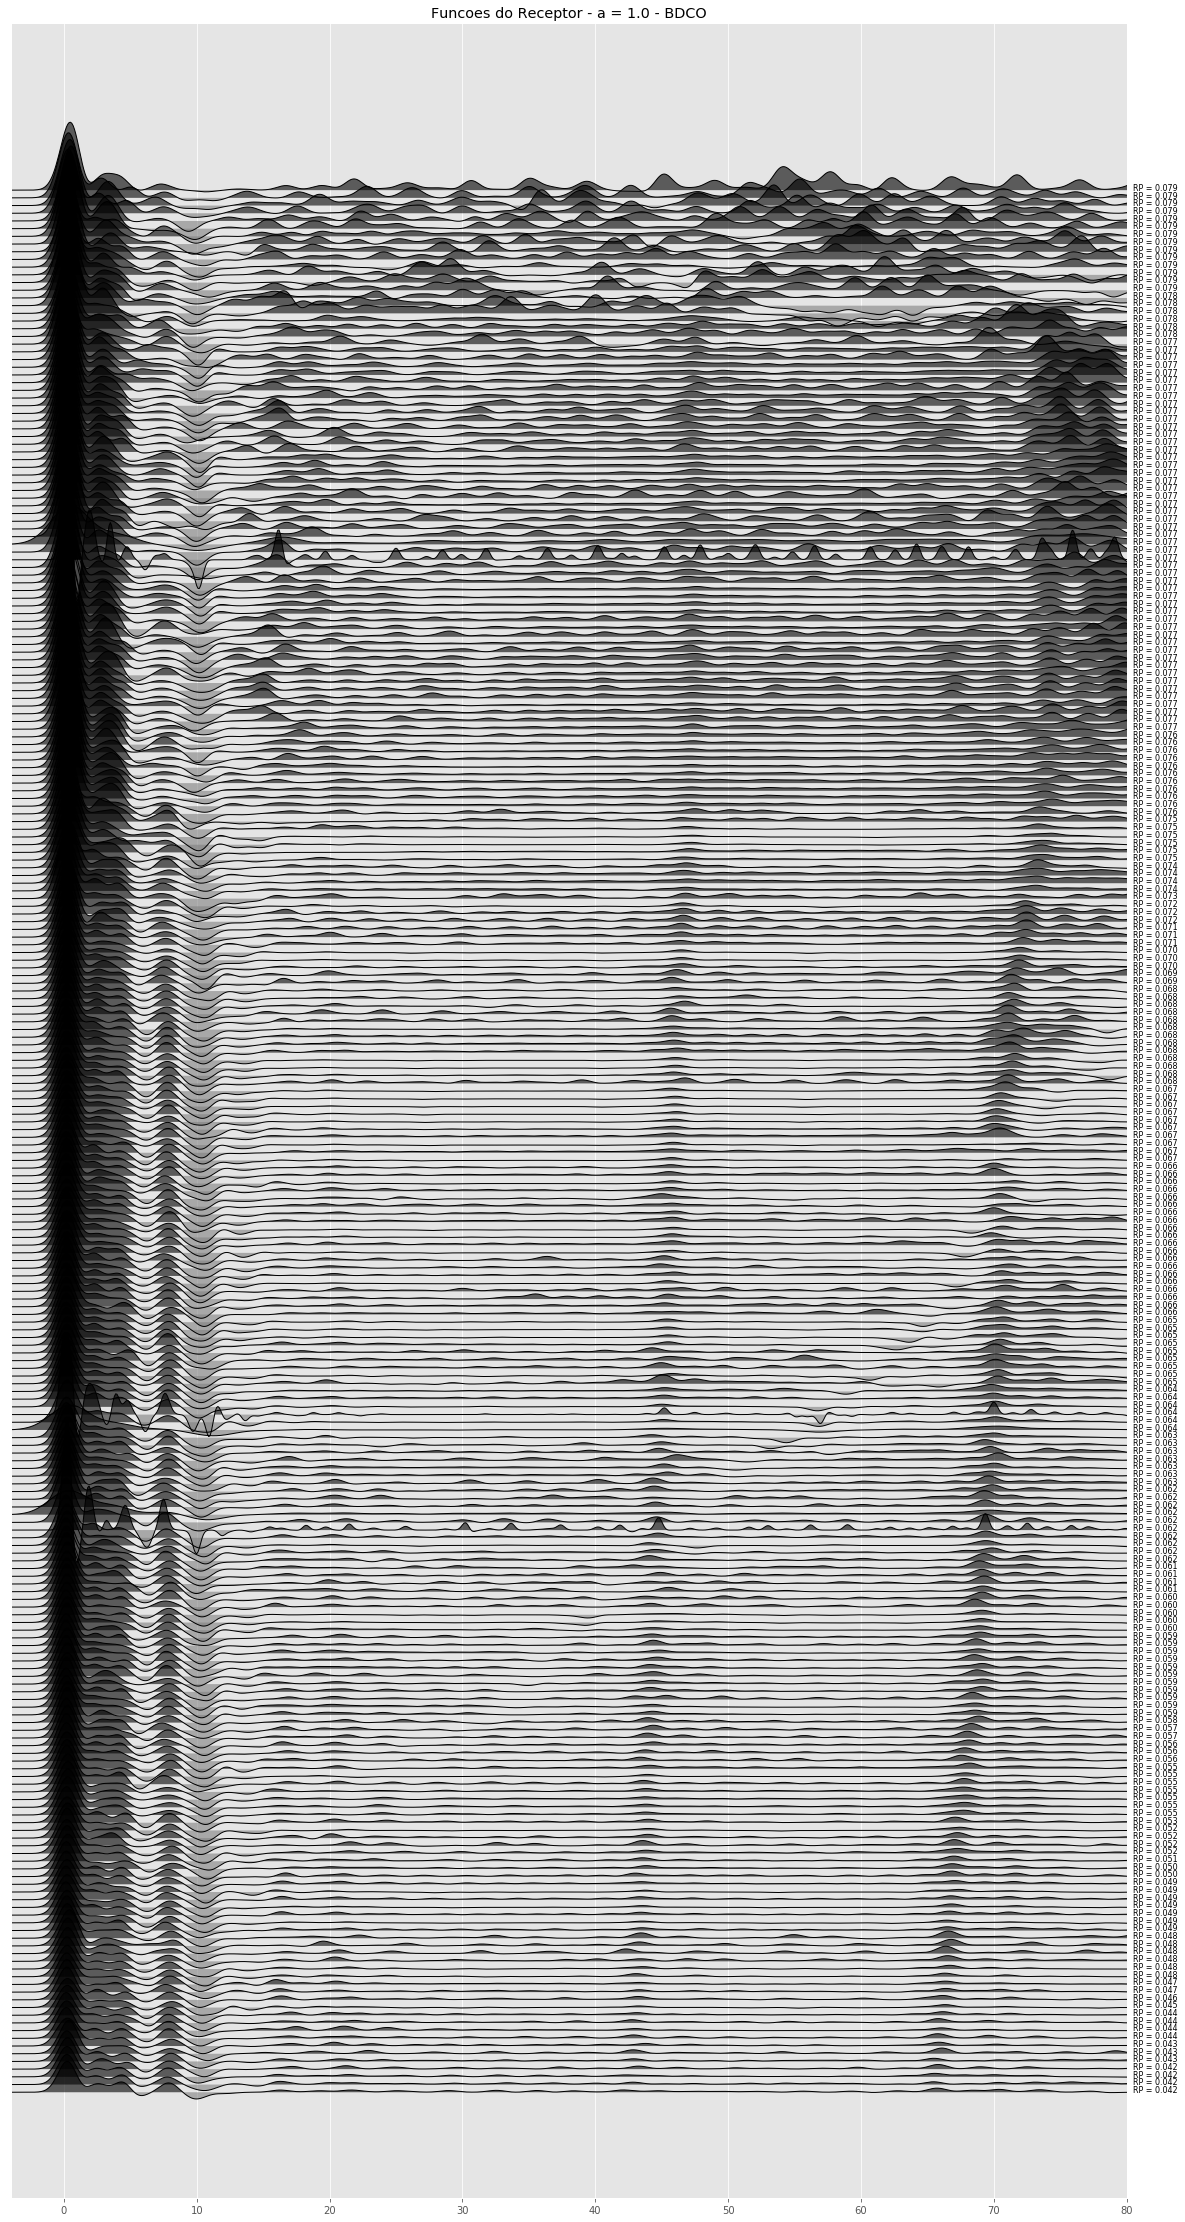

In [27]:
factor = 20
plt.figure(figsize = (20,40))
for j, i in enumerate(orglisl_10): 
    #plt.plot(TF_10[i][0].times()-10,j/factor+TF_10[i][0].data,'r',linewidth=0.7)
    plt.plot(RF_10[i][0].times()-10,j/factor+RF_10[i][0].data,'k',linewidth=1)
    plt.fill_between(RF_10[i][0].times()-10,j/factor+RF_10[i][0].data,j/factor,where=(j/factor+RF_10[i][0].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_10[i][0].times()-10,j/factor+RF_10[i][0].data,j/factor,where=(j/factor+RF_10[i][0].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(80.5,j/factor,'RP = %s' % "{0:.3f}".format(RFRP_10[i]),fontsize=8)
    #plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    #plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    #plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,80)
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z]+'/RF_ a_10_'+STA[z]+'.pdf',dpi=300)

# a = 2.5

In [28]:
RF_25 = []
TF_25 = []
for i,j in enumerate(RF_list_r_25[z]):
    RF = obspy.read(j)
    if RF[0].stats.sac.user5 > 90:
        #TF_25.append(obspy.read(RF_list_t_25[i]))
        RF_25.append(obspy.read(j))

In [29]:
RFgcarc_25 = [i[0].stats.sac.gcarc for i in RF_25]
RFevdp_25 = [i[0].stats.sac.evdp for i in RF_25]
RFbaz_25 = [i[0].stats.sac.baz for i in RF_25]
RFRP_25 = [i[0].stats.sac.user8 for i in RF_25]

orglisl_25 = np.argsort(RFRP_25)

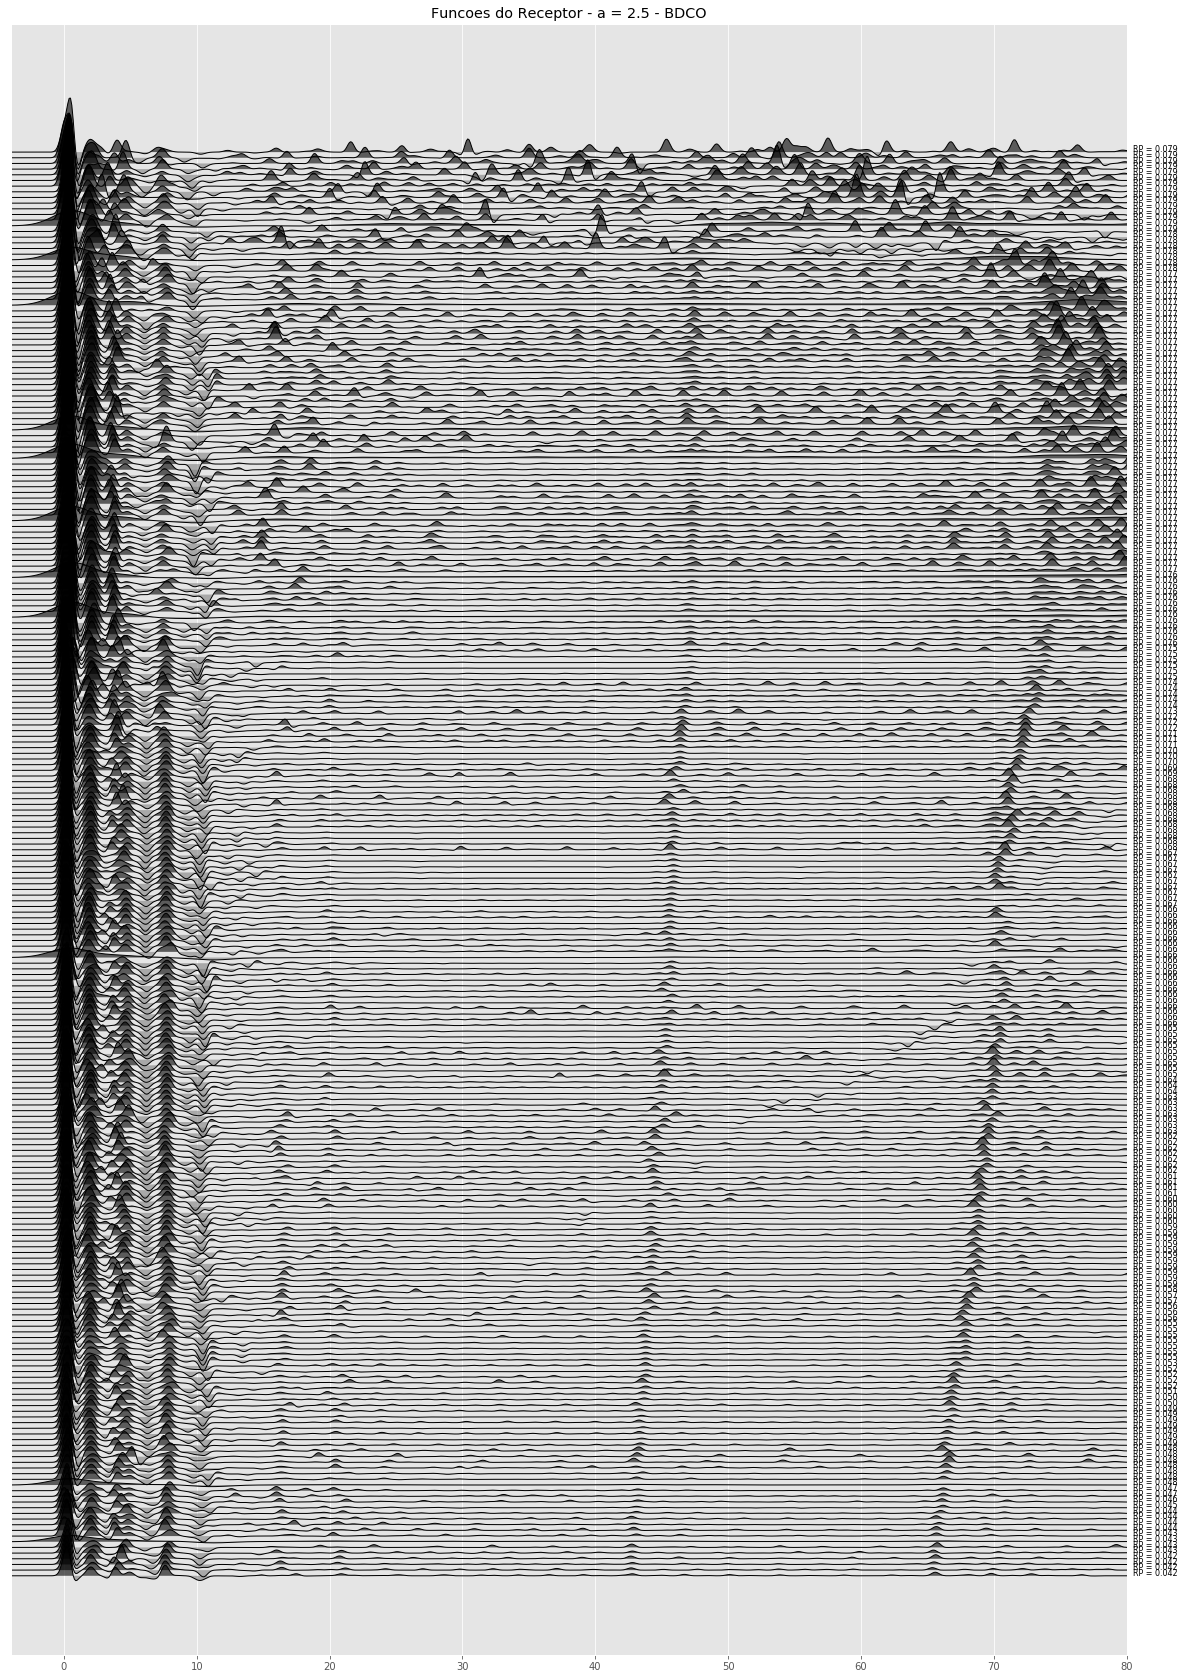

In [30]:
factor = 10
plt.figure(figsize = (20,30))
for j, i in enumerate(orglisl_25): 
    #plt.plot(TF_25[i][0].times()-10,j/factor+TF_25[i][0].data,'r',linewidth=0.7)
    plt.plot(RF_25[i][0].times()-10,j/factor+RF_25[i][0].data,'k',linewidth=1)
    plt.fill_between(RF_25[i][0].times()-10,j/factor+RF_25[i][0].data,j/factor,where=(j/factor+RF_25[i][0].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_25[i][0].times()-10,j/factor+RF_25[i][0].data,j/factor,where=(j/factor+RF_25[i][0].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    plt.text(80.5,j/factor,'RP = %s' % "{0:.3f}".format(RFRP_25[i]),fontsize=8)
    #plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    #plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    #plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,80)
plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/'+STA[z]+'/RF_ a_25_'+STA[z]+'.pdf',dpi=300)